In [3]:
# Importing required libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import numpy as np
from sklearn import metrics

In [18]:
# loading dataset
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("pima-indians-diabetes.csv", header = None, names = col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [19]:
# Feature selection
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = pima[feature_cols]  #Selected features
X = X[1:]
y = pima.label          #Class/output variable
y = y[1:]

In [20]:
# Splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)
X_test.head()

,pregnant,insulin,bmi,age,glucose,bp,pedigree
286,7,135,26,51,136,74,0.647
102,1,0,26.1,22,151,60,0.179
582,6,0,25,27,109,60,0.206
353,3,0,34.4,46,61,82,0.243
727,1,180,36.1,25,116,78,0.496


In [21]:
# Building Random Forest Classifier model
rf_clf = RandomForestClassifier(n_estimators=100, criterion="gini", bootstrap=True)
rf_clf.fit(X_train, y_train)
rf_clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
y_pred_rf = rf_clf.predict(X_test)

In [23]:
# Evaluating the Random Forest Classifier model
print("Accuracy = ", metrics.accuracy_score(y_test, y_pred_rf))

Accuracy =  0.8008658008658008


In [24]:
# Building Decision Tree Classifier model
dt_clf = DecisionTreeClassifier(criterion="gini")
dt_clf = dt_clf.fit(X_train,y_train)
dt_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
y_pred_dt = dt_clf.predict(X_test)

In [26]:
# Evaluate the Decision Tree Classifier model
print("Accuracy = ", metrics.accuracy_score(y_test,y_pred_dt))

Accuracy =  0.670995670995671


In [30]:
# Importing required libraries for plotting the Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', sum_stats=False, cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Summary of statistics will be printed by setting 'sum_stats=True'.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    if sum_stats:
        # Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cm) / float(np.sum(cm))

        #if it is a binary confusion matrix, show some more stats
        if len(cm)==2:
            # Metrics for Binary Confusion Matrices
            precision = cm[1,1] / sum(cm[:,1])
            recall    = cm[1,1] / sum(cm[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""
        
    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label' + stats_text , size = 18)

Normalized confusion matrix
[[0.90410959 0.09589041]
 [0.37647059 0.62352941]]


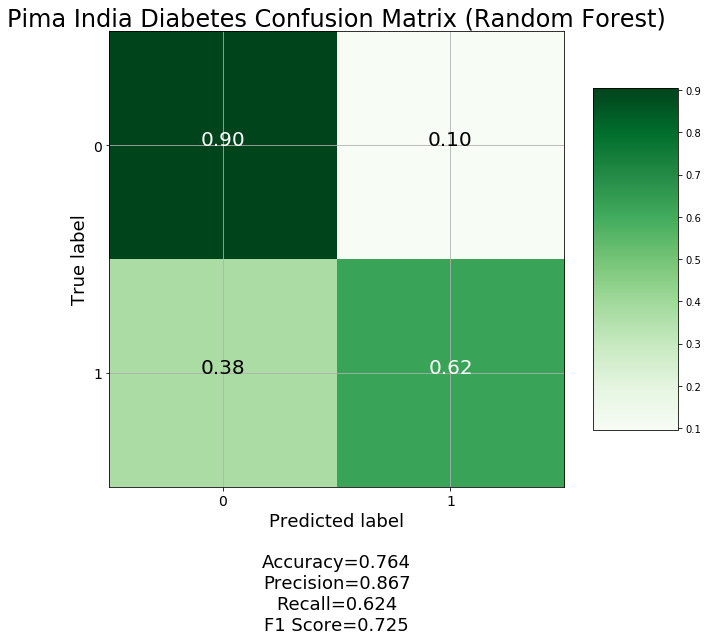

In [31]:
# Plotting the Confusion matrix of Random Forest Classifier
cm = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cm, classes = ['0', '1'],
                      title = 'Pima India Diabetes Confusion Matrix (Random Forest)', normalize=True, sum_stats=True)

plt.savefig('random-forest-cm.png')

Normalized confusion matrix
[[0.78767123 0.21232877]
 [0.52941176 0.47058824]]


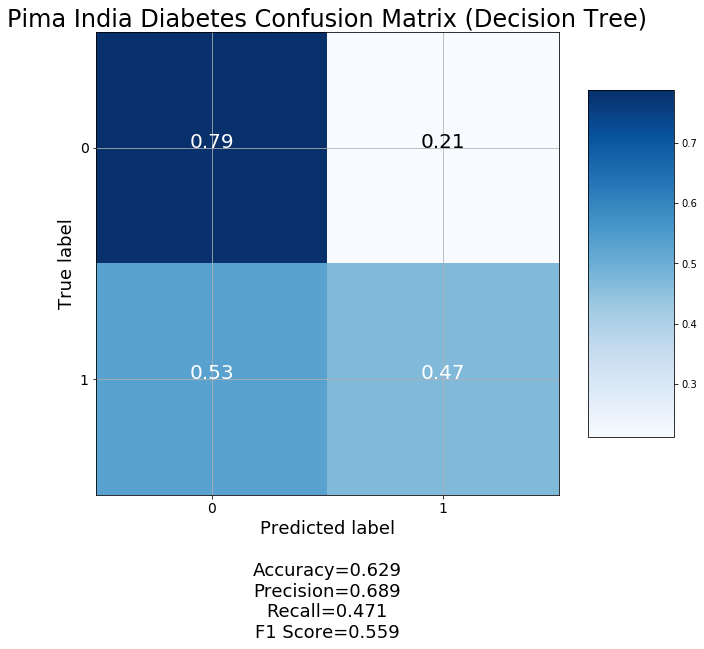

In [32]:
# Plotting the Confusion matrix of Decision Tree Classifier
cm = confusion_matrix(y_test, y_pred_dt)
plot_confusion_matrix(cm, classes = ['0', '1'],
                      title = 'Pima India Diabetes Confusion Matrix (Decision Tree)', normalize=True, sum_stats=True,
                     cmap=plt.cm.Blues)

plt.savefig('decision-tree-cm.png')